### Importing libraries

This section imports all libraries utilised within the programme

(824, 8)
          0         1         2         3         4         5         6  \
0 -1.160877  0.865032  0.984434 -0.316649  1.490340 -0.254253 -0.651440   
1  1.308623 -0.600561  1.234757 -0.177997  0.391057 -1.925925 -0.276186   

          7  
0 -0.277504  
1 -0.277504  
(824,)
Preprocessing done
                                                                           y_pred  \
Model                                                                               
Linear Regression               [58.83067844173603, 52.10425472639661, 64.2772...   
Decision Tree Regression        [51.73, 39.4, 71.3, 35.3, 10.54, 44.28, 23.7, ...   
Random Forest Regression        [50.58919999999996, 40.42360000000006, 72.7301...   
Ridge                           [58.82147520978634, 52.05343504212904, 64.2748...   
Lasso                           [54.62455468242719, 49.06649048822634, 61.2391...   
Elastic Net                     [49.1347262046903, 45.35831614408025, 55.14418...   
Support Vector Re

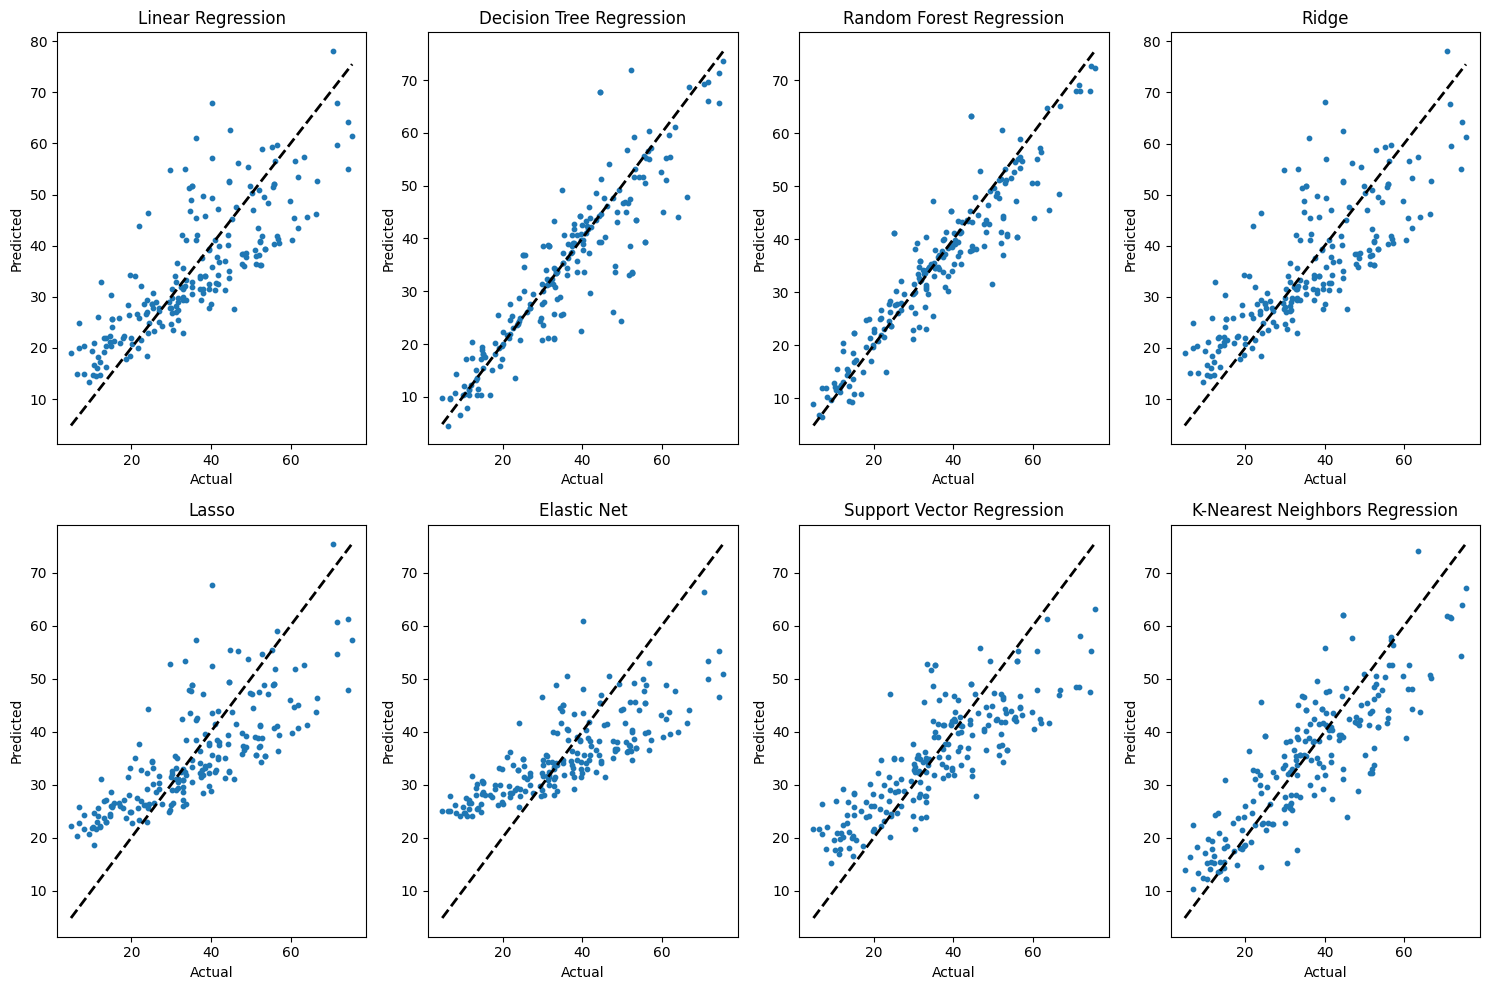

                                                                           y_pred  \
Model                                                                               
Linear Regression               [58.83067844173603, 52.10425472639661, 64.2772...   
Decision Tree Regression        [51.73, 39.4, 71.3, 35.3, 10.54, 44.28, 23.7, ...   
Random Forest Regression        [50.58919999999996, 40.42360000000006, 72.7301...   
Ridge                           [58.82147520978634, 52.05343504212904, 64.2748...   
Lasso                           [54.62455468242719, 49.06649048822634, 61.2391...   
Elastic Net                     [49.1347262046903, 45.35831614408025, 55.14418...   
Support Vector Regression       [41.83374413708075, 53.36749277113666, 55.2966...   
K-Nearest Neighbors Regression  [49.010000000000005, 44.14, 63.838, 44.14, 12....   

                                     RMSE       R^2       MAE  
Model                                                          
Linear Regression    

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Importing necessary libraries for regression models
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing necessary libraries for splitting data and calculating metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#import Knn from sklearn
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive

'''Global variables
    '''
gMethodDictionary = [('Linear Regression', linear_regression),
                    ('Decision Tree Regression', decision_tree_regression),
                    ('Random Forest Regression', random_forest_regression),
                    ('Ridge', ridge_regression), 
                    ('Lasso', perform_lasso),
                    ('Elastic Net', elastic_net_regression),
                    ('Support Vector Regression', perform_svr),
                    ('K-Nearest Neighbors Regression', perform_knn)]

main()

In [52]:
def main():
    X,y = csv_import()
    X_train_preprocessed, X_test_preprocessed, y_train, y_test = preprocessing(X,y)
    print("Preprocessing done")
    comp_graph()
    best_model, df = regression_performance()
    print("The best model is: ", best_model)
    #hyperparameter 
    #var_performance
    var_performance()
    #var plotting


### File importing and preprocessing data
This section imports all libraries utilised within the programme

In [27]:
def csv_import():
    #import data from the files
    dataset = pd.read_csv('Concrete_Data_Yeh_final.csv')

    #Data Preprocessing
    #format as a dataframe
    dataset = pd.DataFrame(dataset)
    #check for null values
    dataset.isnull().sum()
    #check for duplicates
    dataset.duplicated().sum()
    #check for data types
    dataset.dtypes

    y = dataset["csMPa"]
    X = dataset.drop("csMPa", axis=1)

    return X, y

    print(y.head()) 
    print(X.head())

In [30]:
def preprocessing(X,y):
    # Splitting the data into training and test sets

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating a preprocessing pipeline that imputes missing values with the mean 
    # and scales features to have zero mean and unit variance.
    preprocessing_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    # Applying the preprocessing steps to the training data and transforming the test data using the same transformations.
    X_train_preprocessed = pd.DataFrame(preprocessing_pipeline.fit_transform(X_train))
    X_test_preprocessed = pd.DataFrame(preprocessing_pipeline.transform(X_test))

    print(X_train_preprocessed.shape)
    print(X_train_preprocessed.head(2))
    print(y_train.shape)

    return X_train_preprocessed, X_test_preprocessed, y_train, y_test

### Regression functions

This section defines functions for various regression models which are later compared to choose the most effective model.

The regression models included are:

1. **Linear Regression (`linear_regression`)**: This model assumes a linear relationship between the independent and dependent variables. It is simple and provides interpretable results.

2. **Decision Tree Regression (`decision_tree_regression`)**: This model uses a decision tree to predict the dependent variable based on the independent variables. It is a non-parametric method and can capture complex relationships.

3. **Random Forest Regression (`random_forest_regression`)**: This model uses a collection of decision trees to make predictions. It is robust to overfitting and can handle large datasets with many variables.

4. **Lasso Regression (`lasso_regression`)**: This model is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

5. **Elastic Net Regression (`elastic_net_regression`)**: This model combines the properties of both Ridge Regression and LASSO Regression. It works well on datasets with many features.

6. **Ridge Regression (`ridge_regression`)**: This model is a regularization method that uses L2 regularization to prevent overfitting.

7. **Support Vector Regression (`svr_regression`)**: This model uses the principles of Support Vector Machines for regression purposes. It works well for datasets with high dimensional space.

8. **K-Nearest Neighbors Regression (`knn_regression`)**: This model predicts the value for a new instance by calculating the mean of the 'k' closest instances in the training set.

Each function splits the data into a training set and a test set, fits the model to the training data, makes predictions on the test data, and calculates several metrics to evaluate the performance of the model. These metrics include the R2 score, the mean squared error, and the mean absolute error.

---

In [4]:
def linear_regression(X, y, z):

    """
    This function applies the Linear Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.
    z (numpy.ndarray or pandas.DataFrame): The X_test_ data used to predict the y_pred values.
    
    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.
    """
    
   #Creating the Linear Regression model
    regressor = LinearRegression()

    # Fitting the data
    regressor.fit(X, y)

    # Predicting the data
    y_pred = regressor.predict(z)

    return y_pred

In [5]:
def decision_tree_regression(X, y,z):
    """
    This function applies the Decision Tree Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.
    z (numpy.ndarray or pandas.DataFrame): The X_test_ data used to predict the y_pred values.

    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.
    """
    # Creating the Decision Tree regressor
    regressor = DecisionTreeRegressor()

    # Fitting the data
    regressor.fit(X, y)

    # Predicting the data
    y_pred = regressor.predict(z)
    return y_pred

In [6]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regression(X, y, z):
    """
    This function applies the Random Forest Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.
    z (numpy.ndarray or pandas.DataFrame): The X_test_ data used to predict the y_pred values.

    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.
    """
   
   
    # Creating the Random Forest Regressor
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    # Fitting the data
    regressor.fit(X, y)

    # Predicting the data
    y_pred = regressor.predict(z)

    return y_pred

In [7]:
def perform_lasso(X, y,z, alpha=1.0, test_size=0.2, random_state=None):
    """
    Perform Lasso Regression on the given data.

    Parameters:
    X : array-like of shape (n_samples, n_features)
        Training data

    y : array-like of shape (n_samples,)
        Target values
        
    z : (numpy.ndarray or pandas.DataFrame):
        The X_test_ data used to predict the y_pred values.

    alpha : float, optional (default=1.0)
        Constant that multiplies the L1 term. Defaults to 1.0.

    test_size : float, optional (default=0.2)
        Represents the proportion of the dataset to include in the test split.

    random_state : int or RandomState instance, optional (default=None)
        Controls the shuffling applied to the data before applying the split.

    Returns:
    float
        Mean squared error of the Lasso model.
    """
    # Create and train the model
    model = Lasso(alpha=alpha)
    model.fit(X, y)

    # Make predictions and evaluate the model
    y_pred = model.predict(z)
    return y_pred

In [8]:
def elastic_net_regression(X, y,z):
    """
    This function applies the Elastic Net Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.
    z (numpy.ndarray or pandas.DataFrame): The X_test_ data used to predict the y_pred values.

    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.
    """

    # Creating the Elastic Net Regressor
    regressor = ElasticNet(random_state = 0)

    # Fitting the data
    regressor.fit(X, y)

    # Predicting the data
    y_pred = regressor.predict(z)

    return y_pred

In [9]:
def ridge_regression(X, y,z):
    """
    This function applies the Ridge Regression model to the given dataset.

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The independent variables, i.e., the input for the model.
    y (numpy.ndarray or pandas.Series): The dependent variable, i.e., the output for the model.
    z (numpy.ndarray or pandas.DataFrame): The X_test_ data used to predict the y_pred values.
    
    Returns:
    numpy.ndarray: The predicted values of the dependent variable for the test set.

    Prints:
    R2 Score: The coefficient of determination, a statistical measure of how well the regression predictions approximate the real data points.
    Mean Squared Error: The average squared difference between the estimated values and the actual value.
    Mean Absolute Error: The average absolute difference between the estimated values and the actual value.
    """
    
    # Creating the Ridge Regressor
    regressor = Ridge(random_state = 0)

    # Fitting the data
    regressor.fit(X, y)

    # Predicting the data
    y_pred = regressor.predict(z)

    return y_pred

In [10]:
def perform_svr(X, y,z, kernel='rbf', C=1.0, epsilon=0.1, test_size=0.2, random_state=None):
    """
    Perform Support Vector Regression (SVR) on the given data.

    Parameters:
    X : array-like of shape (n_samples, n_features)
        Training data

    y : array-like of shape (n_samples,)
        Target values

    z : (numpy.ndarray or pandas.DataFrame)
        The X_test_ data used to predict the y_pred values.

    kernel : string, optional (default='rbf')
        Specifies the kernel type to be used in the algorithm.
        It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable.

    C : float, optional (default=1.0)
        Regularization parameter. The strength of the regularization is inversely proportional to C.
        Must be strictly positive.

    epsilon : float, optional (default=0.1)
        Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

    test_size : float, optional (default=0.2)
        Represents the proportion of the dataset to include in the test split.

    random_state : int or RandomState instance, optional (default=None)
        Controls the shuffling applied to the data before applying the split.

    Returns:
    float
        Mean squared error of the SVR model.
    """
    # Create and train the model
    model = SVR(kernel=kernel, C=C, epsilon=epsilon)
    model.fit(X, y)

    # Make predictions and evaluate the model
    y_pred = model.predict(z)
    return y_pred

In [11]:
def perform_knn(X, y,z, n_neighbors=5, test_size=0.2, random_state=None):
    """
    Perform K-Nearest Neighbors Regression on the given data.

    Parameters:
    X : array-like of shape (n_samples, n_features)
        Training data

    y : array-like of shape (n_samples,)
        Target values

    z : (numpy.ndarray or pandas.DataFrame)
        The X_test_ data used to predict the y_pred values.

    n_neighbors : int, optional (default=5)
        Number of neighbors to use by default for kneighbors queries.

    test_size : float, optional (default=0.2)
        Represents the proportion of the dataset to include in the test split.

    random_state : int or RandomState instance, optional (default=None)
        Controls the shuffling applied to the data before applying the split.

    Returns:
    float
        Mean squared error of the KNN model.
    """

    # Create and train the model
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X, y)

    # Make predictions and evaluate the model
    y_pred = model.predict(z)
    return y_pred

### Model Evaluation

This section analyses the performance of each regression model to determine which technique most accuratley predicts compressive strength
    
    
    

### Model Predictions    
    

(824,)
(824, 8)


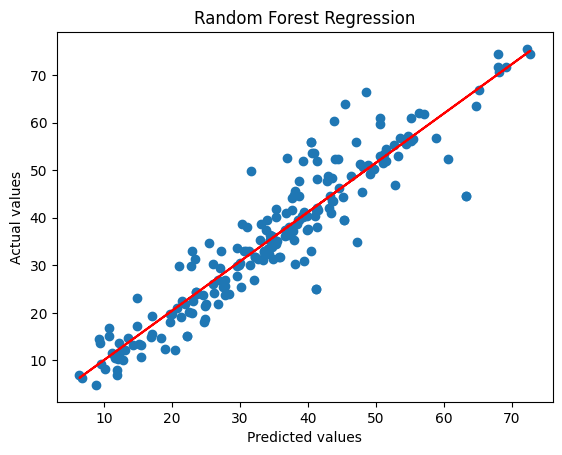

In [12]:
print(y_train.shape)
print(X_train_preprocessed.shape)

y_= random_forest_regression(X_train_preprocessed, y_train, X_test_preprocessed)
plt.scatter(y_, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Random Forest Regression")
#add a trendline
z = np.polyfit(y_, y_test, 1)
p = np.poly1d(z)
plt.plot(y_,p(y_), color='red')

plt.show()


In [38]:
def regression_performance():

    data = []

    # Loop over each model
    for model_name, model in gMethodDictionary:
        # Predict values for y using X_test_preprocessed
        y_pred = model(X_train_preprocessed, y_train, X_test_preprocessed)

        # Calculate RMSE and R^2 score
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        MAE = mean_absolute_error(y_test, y_pred)

        # Append the data to the list
        data.append([model_name, y_pred, rmse, r2, MAE])

    # Create a DataFrame from the data
    df = pd.DataFrame(data, columns=['Model', 'y_pred', 'RMSE', 'R^2','MAE'])

    # Set the model names as the index
    df.set_index('Model', inplace=True)

    # Display the DataFrame
    #print(df)
    # Rank each metric, with the highest being the best for R^2 and the lowest being the best for RMSE and MAE
    df['R^2_rank'] = df['R^2'].rank(ascending=False)
    df['RMSE_rank'] = df['RMSE'].rank()
    df['MAE_rank'] = df['MAE'].rank()

    # Calculate the sum of the ranks
    df['rank_sum'] = df['R^2_rank'] + df['RMSE_rank'] + df['MAE_rank']

    # Find the model with the lowest rank sum
    best_model = df['rank_sum'].idxmin()

    # Print the best model
    return (best_model), df

                                                                           y_pred  \
Model                                                                               
Linear Regression               [58.83067844173603, 52.10425472639661, 64.2772...   
Decision Tree Regression        [51.73, 39.4, 71.3, 35.3, 10.54, 44.28, 23.7, ...   
Random Forest Regression        [50.58919999999996, 40.42360000000006, 72.7301...   
Ridge                           [58.82147520978634, 52.05343504212904, 64.2748...   
Lasso                           [54.62455468242719, 49.06649048822634, 61.2391...   
Elastic Net                     [49.1347262046903, 45.35831614408025, 55.14418...   
Support Vector Regression       [41.83374413708075, 53.36749277113666, 55.2966...   
K-Nearest Neighbors Regression  [49.010000000000005, 44.14, 63.838, 44.14, 12....   

                                     RMSE       R^2       MAE  
Model                                                          
Linear Regression    

('Random Forest Regression',
                                                                            y_pred  \
 Model                                                                               
 Linear Regression               [58.83067844173603, 52.10425472639661, 64.2772...   
 Decision Tree Regression        [51.73, 39.4, 71.3, 35.3, 10.54, 44.28, 23.7, ...   
 Random Forest Regression        [50.58919999999996, 40.42360000000006, 72.7301...   
 Ridge                           [58.82147520978634, 52.05343504212904, 64.2748...   
 Lasso                           [54.62455468242719, 49.06649048822634, 61.2391...   
 Elastic Net                     [49.1347262046903, 45.35831614408025, 55.14418...   
 Support Vector Regression       [41.83374413708075, 53.36749277113666, 55.2966...   
 K-Nearest Neighbors Regression  [49.010000000000005, 44.14, 63.838, 44.14, 12....   
 
                                      RMSE       R^2       MAE  R^2_rank  \
 Model                           

In [14]:
#optimise chosen model
#determine reliance on variables and pairs etc...
#plot interactive graphs

dropVar = 17


print(X_train_preprocessed.head(2))
def var_drop(dropVar):
    """
    Drops columns from the training and testing datasets based on a binary number.

    Each digit in the binary number corresponds to a column in the datasets. If the digit is 1, the corresponding column is dropped. If the digit is 0, the corresponding column is kept.

    Parameters:
    dropVar (int): A binary number where each digit represents a column in the datasets.

    Returns:
    pandas.DataFrame: The modified training dataset with specified columns dropped. Only the first two rows are returned for brevity.
    """


    # Convert the binary number to a list of booleans
    bool_list = [bool(int(x)) for x in format(dropVar, '0{}b'.format(len(X_train_preprocessed.columns)))]

    # Create a list of column names to drop based on the boolean list
    columns_to_drop_train = X_train_preprocessed.columns[bool_list]
    columns_to_drop_test = X_test_preprocessed.columns[bool_list]

    # Drop the columns
    datasetTrain_drop = X_train_preprocessed.drop(columns_to_drop_train, axis=1)
    datasetTest_drop = X_test_preprocessed.drop(columns_to_drop_test, axis=1)

    return datasetTrain_drop, datasetTest_drop

          0         1         2         3         4         5         6  \
0 -1.160877  0.865032  0.984434 -0.316649  1.490340 -0.254253 -0.651440   
1  1.308623 -0.600561  1.234757 -0.177997  0.391057 -1.925925 -0.276186   

          7  
0 -0.277504  
1 -0.277504  


In [58]:
def var_performance():
    var_error_df = pd.DataFrame(columns=[ 'Drop index','Predicted y', 'RMSE', 'R^2', 'MAE'])
    x_train_drop = X_train_preprocessed
    x_test_drop = X_test_preprocessed
    best_model = regression_performance()

    print("Looking for best model",best_model)
    for key, model_function in gMethodDictionary:
        if key == best_model:
            break

    for i in range(254):
        #print(i)
        x_train_drop, x_test_drop = var_drop(i)
        
        y_pred = model_function(x_train_drop, y_train, x_test_drop)
        var_error_df.loc[i] = [bin(i), y_pred, sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred)]
    return var_error_df
var_performance()

                                                                           y_pred  \
Model                                                                               
Linear Regression               [58.83067844173603, 52.10425472639661, 64.2772...   
Decision Tree Regression        [51.73, 39.4, 71.3, 35.3, 10.54, 44.28, 23.7, ...   
Random Forest Regression        [50.58919999999996, 40.42360000000006, 72.7301...   
Ridge                           [58.82147520978634, 52.05343504212904, 64.2748...   
Lasso                           [54.62455468242719, 49.06649048822634, 61.2391...   
Elastic Net                     [49.1347262046903, 45.35831614408025, 55.14418...   
Support Vector Regression       [41.83374413708075, 53.36749277113666, 55.2966...   
K-Nearest Neighbors Regression  [49.010000000000005, 44.14, 63.838, 44.14, 12....   

                                     RMSE       R^2       MAE  
Model                                                          
Linear Regression    

,Drop index,Predicted y,RMSE,R^2,MAE
0,0b0,"[49.010000000000005, 44.14, 63.838, 44.14, 12....",8.628065,0.711098,6.838311
1,0b1,"[48.736, 57.220000000000006, 69.55799999999999...",11.612946,0.476629,9.443602
2,0b10,"[47.246, 44.14, 65.0, 44.14, 9.42, 47.992, 29....",8.887511,0.693462,6.785903
3,0b11,"[46.874, 70.1, 65.0, 70.1, 9.42, 47.992, 29.80...",12.547161,0.389036,10.131495
4,0b100,"[49.010000000000005, 44.14, 63.838, 39.1200000...",8.444797,0.723240,6.395223
...,...,...,...,...,...
249,0b11111001,"[50.262, 70.22, 70.22, 70.22, 28.976, 41.686, ...",15.435952,0.075320,12.438117
250,0b11111010,"[49.596000000000004, 40.675999999999995, 67.02...",12.415518,0.401789,9.525243
251,0b11111011,"[43.128, 62.720000000000006, 62.72000000000000...",15.409955,0.078432,12.263699
252,0b11111100,"[49.596000000000004, 41.05400000000001, 67.020...",12.352601,0.407837,9.898223


Graph

                                                                           y_pred  \
Model                                                                               
Linear Regression               [58.83067844173603, 52.10425472639661, 64.2772...   
Decision Tree Regression        [48.7, 39.4, 71.3, 35.3, 10.54, 44.28, 23.7, 4...   
Random Forest Regression        [50.58919999999996, 40.42360000000006, 72.7301...   
Ridge                           [58.82147520978634, 52.05343504212904, 64.2748...   
Lasso                           [54.62455468242719, 49.06649048822634, 61.2391...   
Elastic Net                     [49.1347262046903, 45.35831614408025, 55.14418...   
Support Vector Regression       [41.83374413708075, 53.36749277113666, 55.2966...   
K-Nearest Neighbors Regression  [49.010000000000005, 44.14, 63.838, 44.14, 12....   

                                     RMSE       R^2       MAE  
Model                                                          
Linear Regression    

Checkbox(value=True, description='0')

Checkbox(value=True, description='1')

Checkbox(value=True, description='2')

Checkbox(value=True, description='3')

Checkbox(value=True, description='4')

Checkbox(value=True, description='5')

Checkbox(value=True, description='6')

Checkbox(value=True, description='7')

['0', '1', '2', '3', '4', '5', '6', '7']
Binary string: 00000000
Binary int: 0
[40.4236 72.7301]


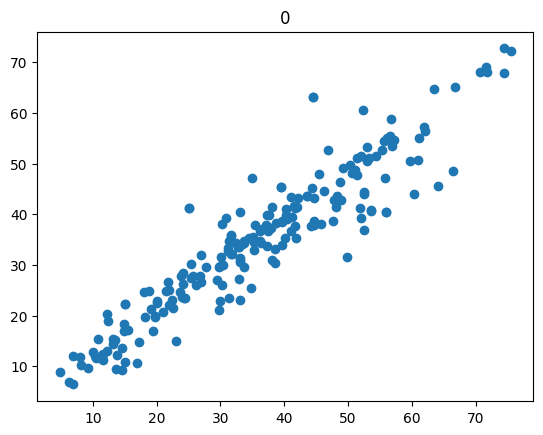

['0', '1', '2', '3', '4', '5', '6']
Binary string: 00000001
Binary int: 1
[40.4236 72.7301]


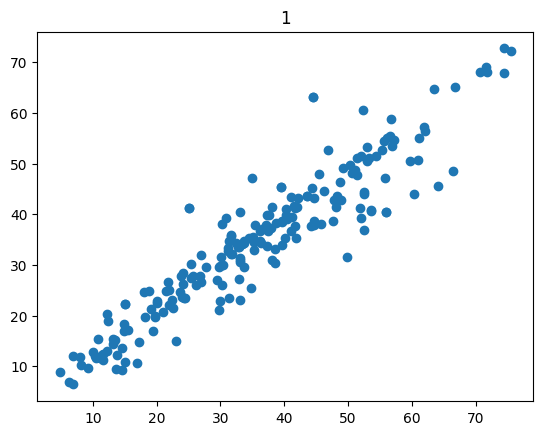

['0', '1', '2', '3', '4', '5']
Binary string: 00000011
Binary int: 3
[40.4236 72.7301]


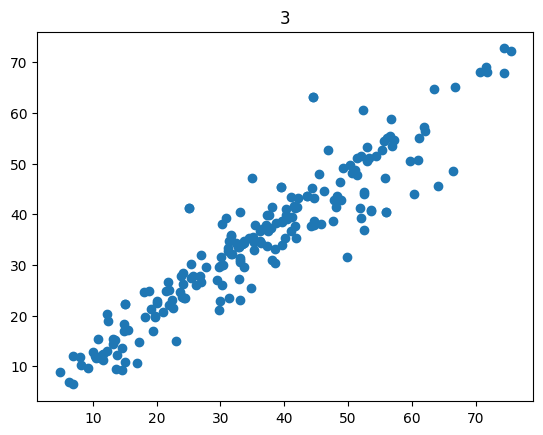

['0', '1', '2', '3', '4']
Binary string: 00000111
Binary int: 7
[40.4236 72.7301]


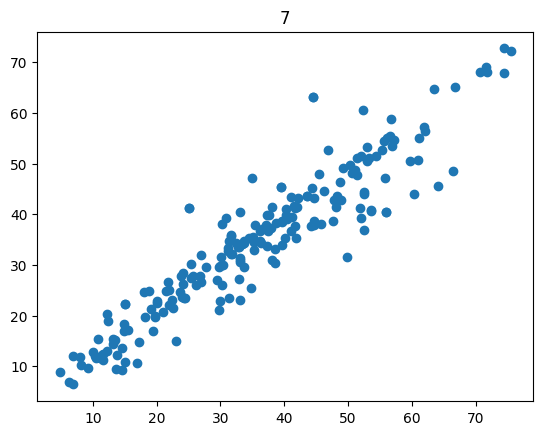

['0', '1', '3', '4']
Binary string: 00100111
Binary int: 39
[40.4236 72.7301]


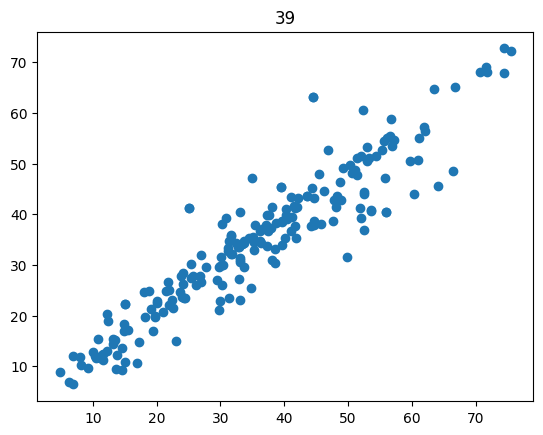

['0', '1', '4']
Binary string: 00110111
Binary int: 55
[40.4236 72.7301]


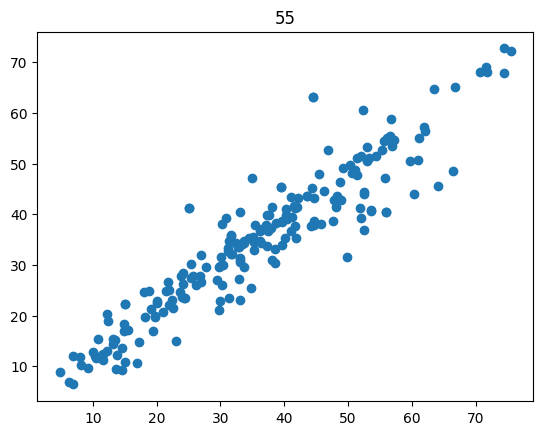

['0', '1']
Binary string: 00111111
Binary int: 63
[40.4236 72.7301]


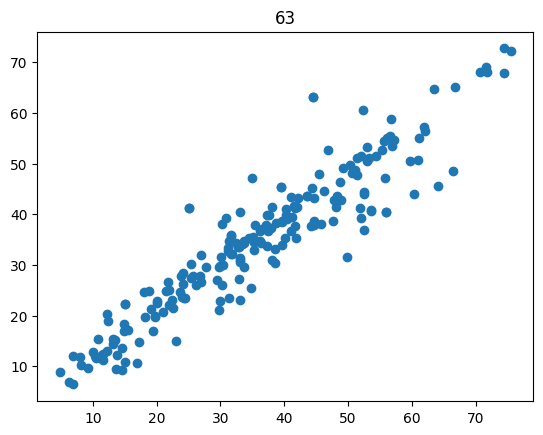

['0', '1', '6']
Binary string: 00111101
Binary int: 61
[40.4236 72.7301]


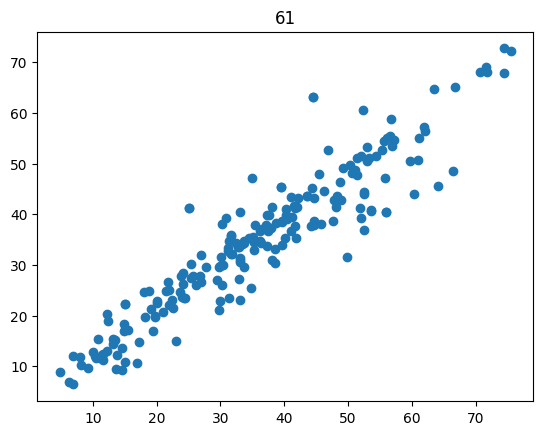

In [20]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


def interactive_plot(X_train, X_test, y_train, y_test):
    plt.ion()
    var_error_df = pd.DataFrame(var_performance())
    variables = X_train.columns.tolist()

    # Create a checkbox for each variable
    checkboxes = [widgets.Checkbox(value=True, description=str(var), disabled=False) for var in variables]

    # Create the figure object
    fig, ax = plt.subplots()

    # Function to update the plot based on the selected checkboxes
    def update(_):
        active_vars = [var.description for var in checkboxes if var.value]
        print(active_vars)
        binary_string = ''.join(['1' if not checkbox.value else '0' for checkbox in checkboxes])
        print(f'Binary string: {binary_string}')
        binary_int = int(binary_string,2)
        print(f'Binary int: {binary_int}')

        plt.cla()
        plt.scatter(y_test, var_error_df.loc[binary_int].iloc[1])
        #add a title to the subplot

        plt.title(binary_int)
           
        print((var_error_df.loc[binary_int].iloc[1])[1:3])
        fig.canvas.draw_idle()
        #plt.show()
        fig.canvas.flush_events()
              


        #model = RandomForestRegressor().fit(X_train[active_vars], y_train)  # retrain the model
        #y_pred = model.predict(X_test[active_vars])  # make predictions on the test data
        #ax.clear()  # clear the previous plot
        #ax.scatter(y_test, y_pred)  # plot the new data
        #fig.canvas.draw_idle()

    # Call the update function whenever a checkbox is clicked
    for checkbox in checkboxes:
        checkbox.observe(update, 'value')

    # Display the checkboxes
    display(*checkboxes)

    # Call the function to display the initial plot
    update(None)

interactive_plot(X_train_preprocessed, X_test_preprocessed, y_train, y_test)

                                                                           y_pred  \
Model                                                                               
Linear Regression               [58.83067844173603, 52.10425472639661, 64.2772...   
Decision Tree Regression        [51.73, 39.4, 71.3, 35.3, 10.54, 44.28, 23.7, ...   
Random Forest Regression        [50.58919999999996, 40.42360000000006, 72.7301...   
Ridge                           [58.82147520978634, 52.05343504212904, 64.2748...   
Lasso                           [54.62455468242719, 49.06649048822634, 61.2391...   
Elastic Net                     [49.1347262046903, 45.35831614408025, 55.14418...   
Support Vector Regression       [41.83374413708075, 53.36749277113666, 55.2966...   
K-Nearest Neighbors Regression  [49.010000000000005, 44.14, 63.838, 44.14, 12....   

                                     RMSE       R^2       MAE  
Model                                                          
Linear Regression    

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

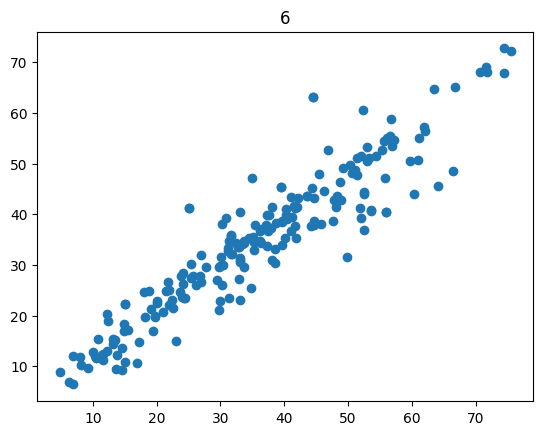

In [47]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


def interactive_plot(X_train, X_test, y_train, y_test):
    plt.ion()
    var_error_df = pd.DataFrame(var_performance())
    variables = X_train.columns.tolist()

    # Create a checkbox for each variable
    checkboxes = [widgets.Checkbox(value=True, description=str(var), disabled=False) for var in variables]

    # Create the figure object
    fig, ax = plt.subplots()

    # Function to update the plot based on the selected checkboxes
    for i in range(7):
        #active_vars = [var.description for var in checkboxes if var.value]
        #print(active_vars)
        #binary_string = ''.join(['1' if not checkbox.value else '0' for checkbox in checkboxes])
        #print(f'Binary string: {binary_string}')
        #binary_int = int(binary_string,2)
        #print(f'Binary int: {binary_int}')

        #reset the subplot
        plt.clf()
        fig, ax = plt.subplots()
        ax.set_title(i)
        ax.scatter(y_test, var_error_df.loc[i].iloc[1])
        
        
           
        #print((var_error_df.loc[binary_int].iloc[1])[1:3])
        fig.canvas.draw_idle()
        #plt.show()
        #fig.canvas.flush_events()
              
    # Call the update function whenever a checkbox is clicked
    #for checkbox in checkboxes:
     #   checkbox.observe(update, 'value')

    # Display the checkboxes
    #display(*checkboxes)

    # Call the function to display the initial plot
    #update(None)

interactive_plot(X_train_preprocessed, X_test_preprocessed, y_train, y_test)

In [33]:
def comp_graph():
    # Number of models taking the data from the data frame in the regression performance function
    best_model, df = regression_performance()
    n_models = len(df)

    # Create a figure and axes with a subplot for each model
    fig, axs = plt.subplots(2, 4, figsize=(15, 10))

    # Flatten the axes array
    axs = axs.flatten()

    # Loop over each model
    for i, (model_name, row) in enumerate(df.iterrows()):
        # Plot y_test vs y_pred
        axs[i].scatter(y_test, row['y_pred'], s=10)
        axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axs[i].set_xlabel('Actual')
        axs[i].set_ylabel('Predicted')
        axs[i].set_title(f'{model_name}')

    # Remove unused subplots
    for i in range(n_models, len(axs)):
        fig.delaxes(axs[i])

    # Display the plot
    plt.tight_layout()
    plt.show()